In [1]:
# %pip install arcgis

Link for this data: 
Interesting link: https://www.city-data.com/so/so-Baltimore-Maryland.html


In [2]:
import pandas as pd
import numpy as np
import sys, os
from arcgis.features import GeoAccessor
import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# opening_date = pd.to_datetime(opening_date).date()
# print(opening_date) 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

In [6]:
type_dict = {
    'X': 'float32',
    'Y': 'float32',
    'RowID': 'int',
    'City': 'str',
    'CaseNumber':'str',
    'Post': 'str',
    'ZipCode': 'str'
    }

In [7]:
df=pd.read_csv('folders/data/GunOffenders.csv', dtype=type_dict,)
# df.sample(10)
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
1763,1413470.625,589326.0,1764,18-0270,2018/05/15 00:00:00+00,2020/12/29 00:00:00+00,Bradds,William,NaN,1989/02/01 00:00:00+00,Male,White,1611 Mchenry St,Baltimore,Md,21223,Southern,935,New Southwest/Mount Clare,39.2843,-76.6427,"(39.2843,-76.6427)",NaN


In [8]:
df['DateOfBirth'] = df['DateOfBirth'].str.split(' ', expand=True)

In [9]:
df['CreatedDate'] = df['CreatedDate'].str.split(' ', expand=True)

In [10]:
df['ModifiedDate'] = df['ModifiedDate'].str.split(' ', expand=True)

In [11]:
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], errors='coerce')
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], errors='coerce')


In [12]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
1814,1430045.125,598392.8125,1815,18-0141,2018-03-13,2020-12-07,Davis,Dominez,NaN,1991-04-22,Male,Black,2410 E Federal St,Baltimore,Md,21213,Eastern,331,Broadway East,39.309,-76.584,"(39.309,-76.584)",NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             2530 non-null   float32       
 1   Y             2530 non-null   float32       
 2   RowID         2748 non-null   int64         
 3   CaseNumber    2748 non-null   object        
 4   CreatedDate   2748 non-null   datetime64[ns]
 5   ModifiedDate  2748 non-null   datetime64[ns]
 6   LastName      2748 non-null   object        
 7   FirstName     2748 non-null   object        
 8   MiddleName    399 non-null    object        
 9   DateOfBirth   2747 non-null   datetime64[ns]
 10  Gender        2748 non-null   object        
 11  Race          2748 non-null   object        
 12  FullAddress   2530 non-null   object        
 13  City          2530 non-null   object        
 14  State         2530 non-null   object        
 15  ZipCode       2527 non-null   object  

In [14]:
from dateutil.relativedelta import relativedelta
from datetime import date

In [15]:
df['age']=df['CreatedDate']-df['DateOfBirth']
df['Age'] = df['age']/np.timedelta64(1,'Y')
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age
716,1409381.5,607886.4375,717,20-0020,2020-01-23,2020-12-07,James,Eugene,NaN,1993-07-09,Male,Black,2407 Keyworth Ave,Baltimore,Md,21215,Northern,533,Park Circle,39.3353,-76.6569,"(39.3353,-76.6569)",NaN,9694 days,26.541271


In [16]:
# find unique value count
df.nunique(axis = 0)

X               2401
Y               2407
RowID           2748
CaseNumber      2745
CreatedDate      967
ModifiedDate     160
LastName        1211
FirstName       1129
MiddleName       263
DateOfBirth     2407
Gender             2
Race               5
FullAddress     2450
City              46
State              1
ZipCode           69
District           9
Post             122
Neighborhood     213
Latitude        1066
Longitude       1382
GeoLocation     2413
Shape              0
age             2320
Age             2320
dtype: int64

In [17]:
count_series = df.groupby(['FirstName', 'LastName']).size()
count_series

FirstName  LastName 
Aamir      Benton       1
Aaron      Alexander    1
           Atkins       1
           Ausby        1
           Bryant       1
                       ..
Zebary     Pearson      1
Zhamiel    Dixon        1
Ziyon      Thompson     1
Zuri       Kelly        1
`Montaez   Allen        1
Length: 2690, dtype: int64

In [18]:
new_df = count_series.to_frame(name = 'size').reset_index()


In [19]:
new_df.nlargest(5, 'size')

,FirstName,LastName,size
110,Anthony,Brown,3
154,Antoine,Jones,3
177,Antonio,Moore,3
1902,Michael,Smith,3
1910,Michael,Williams,3


In [20]:
df.sort_values('Age', ascending=True).head(1)

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age
206,1411806.25,595220.125,207,21-0171,2021-06-04,2021-06-04,Chance,Brion,NaN,2019-02-15,Male,Black,1022 Appleton St,Baltimore,Md,21217,Western,722,Midtown-Edmondson,39.3005,-76.6485,"(39.3005,-76.6485)",NaN,840 days,2.299842


In [21]:
df['Age'].isna().sum()
#only one null value

1

In [22]:
df['Age'].mean()

28.384672316497745

In [23]:
df['Age'].median()

26.240100754977856

In [24]:
df['Race'].value_counts()


Black      2653
White        71
Unknown      19
Asian         4
Indian        1
Name: Race, dtype: int64

In [25]:
df['Gender'].value_counts()

Male      2688
Female      60
Name: Gender, dtype: int64

In [26]:
df['Age'].min(axis = 0)

2.299841885870346

In [27]:
df['Age'].max(axis = 0)

80.28364716592401

In [28]:
df.sort_values('Age', axis=0, ascending=True)

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age
206,1411806.250,595220.1250,207,21-0171,2021-06-04,2021-06-04,Chance,Brion,NaN,2019-02-15,Male,Black,1022 Appleton St,Baltimore,Md,21217,Western,722,Midtown-Edmondson,39.3005,-76.6485,"(39.3005,-76.6485)",NaN,840 days,2.299842
2710,1426328.375,568545.4375,2711,09-0260,2009-08-13,2021-08-23,Dorsey,Raheem,Jabar,1994-06-02,Male,Black,1107 Seaboard Ct,Baltimore,Md,21225,Southern,913,Brooklyn,39.2271,-76.5976,"(39.2271,-76.5976)",NaN,5551 days,15.198122
2624,1409505.750,589857.1250,2625,11-0487,2011-11-21,2020-12-07,Holt,Arteesha,NaN,1996-04-23,Female,Black,2526 W Lombard St,Baltimore,Md,21223,Southwest,835,Shipley Hill,39.2858,-76.6567,"(39.2858,-76.6567)",NaN,5690 days,15.578691
2679,1426750.125,594844.9375,2680,10-0354,2010-08-31,2020-12-07,Hall,Anthony,NaN,1994-07-07,Male,Black,1621 E Madison St,Baltimore,Md,21287,Eastern,323,Gay Street,39.2993,-76.5957,"(39.2993,-76.5957)",NaN,5899 days,16.150913
2361,1426193.000,592839.1875,2362,15-0040,2015-01-22,2021-05-04,Moore,Torray,NaN,1998-11-11,Male,Black,210 N Spring Ct,Baltimore,Md,21231,Southeast,212,Dunbar-Broadway,39.2938,-76.5977,"(39.2938,-76.5977)",NaN,5916 days,16.197458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,1402956.375,592965.7500,2350,15-0119,2015-03-23,2021-08-24,Cobb,Jessie,NaN,1945-05-02,Male,Black,607 Mount Holly St,Baltimore,Md,21229,Southwest,815,Edgewood,39.2944,-76.6798,"(39.2944,-76.6798)",NaN,25527 days,69.890552
643,NaN,NaN,644,20-0096,2020-03-02,2020-12-07,Wynne,Hardaway,NaN,1948-01-29,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,26331 days,72.091829
1477,NaN,NaN,1478,18-0667,2018-12-06,2020-12-07,Gomez,Irvin,NaN,1944-08-31,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,27125 days,74.265728
1574,1361726.875,619188.4375,1575,18-0563,2018-10-10,2021-03-30,Chavis,Gordon,NaN,1938-06-29,Male,Black,"9620 Mendoza Road, Randallstown, 21133",Randallstown,Md,21133,NaN,NaN,NaN,39.3667,-76.8253,"(39.3667,-76.8253)",NaN,29323 days,80.283647


In [29]:
df['FullAddress'].isna().sum()

218

In [30]:
print(2450 + 218)

2668


BEGINNING OF REVIEW:

In [31]:
addressesdf=df.groupby(df['FullAddress'].tolist()).size().reset_index().\
    rename(columns={0:'records'})
addressesdf.sort_values('records', ascending=False, inplace=True)
# addressesdf


In [32]:
address_count = dict()
for i in df['FullAddress']:
  address_count[i] = address_count.get(i, 0) + 1


In [33]:
# address_count

In [34]:
addressDict={}
for address in df['FullAddress']:
    address_count=1
    if not address in addressDict:
        addressDict[address]=address_count

    else:
        addressDict[address]=address_count=+1



In [35]:
address_df=pd.DataFrame.from_dict(addressDict,orient='index')
address_df.head()
address_df.sort_values(0,ascending=True)
address_df.tail()


,0
1302 Glyndon Ave,1
132 Denison St,1
2622 Loyola Northway,1
708 E 21st St,1
1734 Appleton St,1


END OF REVIEW ^

In [36]:
df['Age'] = df['Age'].astype(float)

In [37]:
# df['CreatedDate'].astype()

In [38]:
df['month'] = pd.DatetimeIndex(df['CreatedDate']).month

In [39]:
df['date_month'] = pd.DatetimeIndex(df['CreatedDate']).day

In [40]:
df['year'] = pd.DatetimeIndex(df['CreatedDate']).year

In [41]:
years_by_count=df[['RowID','year']].groupby('year').agg('count')


In [42]:
days_by_count = df[['RowID','date_month']].groupby('date_month').agg('count')


<AxesSubplot:xlabel='date_month'>

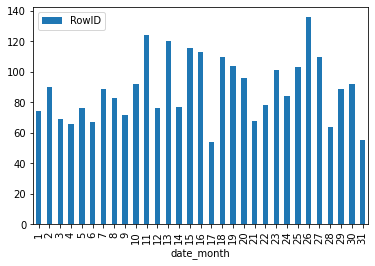

In [43]:
days_by_count.plot.bar()

In [44]:
days_by_count.sort_values('RowID', ascending=False, inplace=True)


<AxesSubplot:xlabel='date_month'>

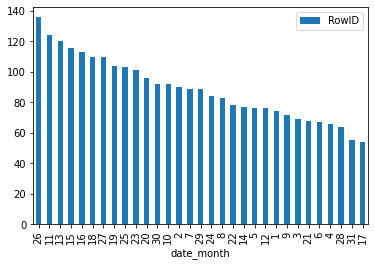

In [45]:
days_by_count.plot.bar()

In [46]:
months_by_count = df[['RowID','month']].groupby('month').agg('count')
months_by_count.sort_values('RowID', ascending=False, inplace=True)

<AxesSubplot:xlabel='month'>

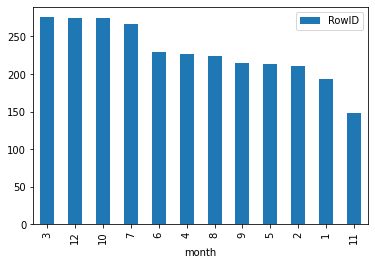

In [47]:
months_by_count.plot.bar()

<AxesSubplot:ylabel='month'>

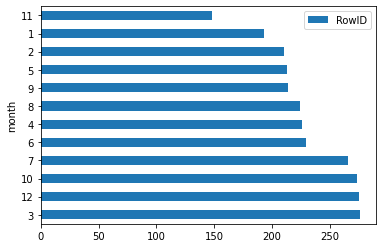

In [48]:
months_by_count.plot.barh()

In [49]:
mon_day_series = df.groupby(['month', 'date_month']).size()


In [97]:
mon_day_series.describe()

count    353.000000
mean       7.784703
std        5.574301
min        1.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       40.000000
dtype: float64

In [99]:
mon_day_series[12,26]

40

<AxesSubplot:>

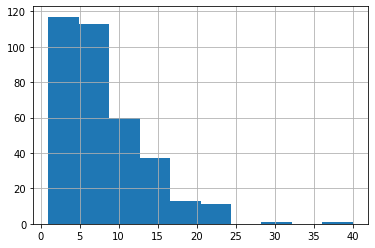

In [100]:
mon_day_series.hist()

<AxesSubplot:>

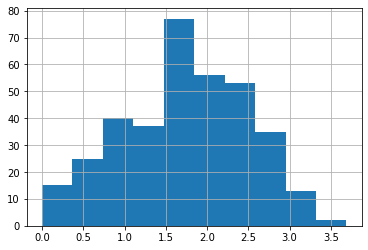

In [102]:
np.log(mon_day_series).hist()

In [103]:
np.log(mon_day_series).describe()

count    353.000000
mean       1.798941
std        0.745577
min        0.000000
25%        1.386294
50%        1.791759
75%        2.397895
max        3.688879
dtype: float64

In [104]:
np.log(40)

3.6888794541139363

In [105]:
np.exp(3.688)

39.964837299699624

In [106]:
np.exp(1.798941)

6.043244278833318

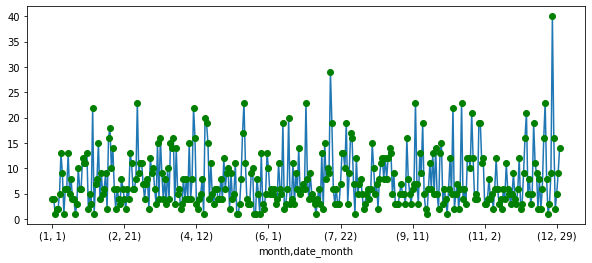

In [50]:

ax = mon_day_series.plot()
ax = mon_day_series.reindex(mon_day_series.index).plot(marker='o',linestyle='none',color='g', ax=ax, figsize=(10, 4))

In [51]:
ax.figure.savefig('plot.png')

<AxesSubplot:xlabel='month,date_month'>

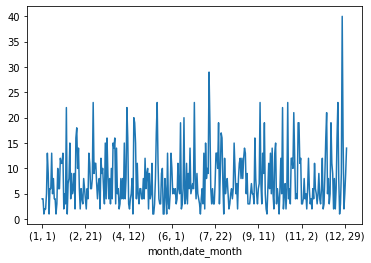

In [52]:

mon_day_series.plot()

<AxesSubplot:xlabel='month,date_month'>

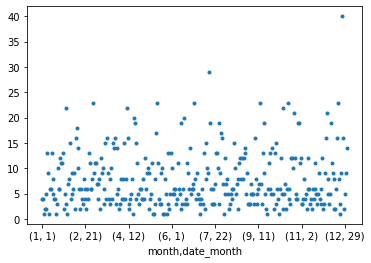

In [53]:

#great way to plot a series!
mon_day_series.plot(style='.')

In [54]:
scatter_df=mon_day_series.to_frame(name = 'size').reset_index()

<AxesSubplot:xlabel='date_month', ylabel='size'>

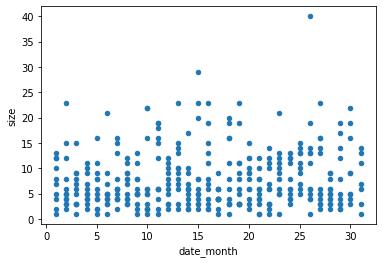

In [55]:
scatter_df.plot(kind='scatter',x='date_month',y='size')

<AxesSubplot:xlabel='month', ylabel='size'>

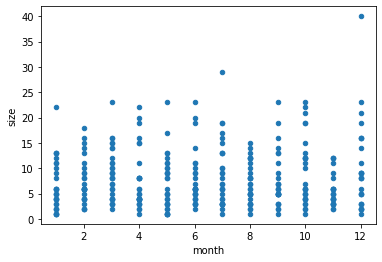

In [56]:
scatter_df.plot(kind='scatter',x='month',y='size')

In [57]:
dec_26_df = df[ (df['date_month']==26) & (df['month']==12) ]
dec_26_df

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year
758,1420365.750,598860.5000,759,19-0678,2019-12-26,2021-06-15,Sutoon,Juan,NaN,1993-10-03,Male,Black,124 W Trenton St,Baltimore,Md,21201,Central,134,Charles North,39.3104,-76.6182,"(39.3104,-76.6182)",NaN,9580 days,26.229149,12,26,2019
759,1435344.375,602679.1250,760,19-0677,2019-12-26,2021-01-14,Caldwell-Jackson,Nyheem,NaN,2001-05-22,Male,Black,3522 Pelham Ave,Baltimore,Md,21213,Northeast,432,Belair-Edison,39.3207,-76.5652,"(39.3207,-76.5652)",NaN,6792 days,18.595864,12,26,2019
760,1410320.750,583959.6250,761,19-0676,2019-12-26,2020-12-07,Shrout,Dustin,Edward,1999-02-24,Male,White,1601 Sexton St,Baltimore,Md,21230,Southwest,831,Morrell Park,39.2696,-76.6539,"(39.2696,-76.6539)",NaN,7610 days,20.835472,12,26,2019
761,1409321.500,608796.8125,762,19-0675,2019-12-26,2020-12-07,Curbeam,Larry,NaN,2000-12-08,Male,Black,2302 Oswego Ave,Baltimore,Md,21215,Northern,533,Greenspring,39.3378,-76.6571,"(39.3378,-76.6571)",NaN,6957 days,19.047619,12,26,2019
762,1440317.000,609733.1875,763,19-0674,2019-12-26,2021-08-26,Lingham,Xzavin,Vernon,2000-12-28,Male,Black,4219 Berger Ave,Baltimore,Md,21206,Northeast,444,Frankford,39.3400,-76.5475,"(39.34,-76.5475)",NaN,6937 days,18.992861,12,26,2019
763,1416776.000,576918.8125,764,19-0673,2019-12-26,2021-07-23,Johnson,Donyae,NaN,1998-05-07,Male,Black,1216 Shellbanks Rd,Baltimore,Md,21225,Southern,922,Cherry Hill,39.2502,-76.6312,"(39.2502,-76.6312)",NaN,7903 days,21.637679,12,26,2019
764,1432793.875,603577.6875,765,19-0672,2019-12-26,2020-12-07,Thomas,Glen,NaN,1987-01-02,Male,Black,2826 Mayfield Ave,Baltimore,Md,21213,Northeast,432,Belair-Edison,39.3232,-76.5742,"(39.3232,-76.5742)",NaN,12046 days,32.980828,12,26,2019
765,1413712.625,534765.7500,766,19-0671,2019-12-26,2020-12-07,Smith,Corey,NaN,1994-02-26,Male,Black,"7930 E Park Dr, Glen Burnie, 21061",Glen Burnie,Md,21060,NaN,NaN,NaN,39.1345,-76.6426,"(39.1345,-76.6426)",NaN,9434 days,25.829415,12,26,2019
766,1425119.500,598844.3750,767,19-0670,2019-12-26,2020-12-07,Curry,George,NaN,1958-10-30,Male,Black,1233 E Lafayette Ave,Baltimore,Md,21202,Eastern,314,Oliver,39.3103,-76.6014,"(39.3103,-76.6014)",NaN,22337 days,61.156629,12,26,2019
767,1406273.500,606927.9375,768,19-0669,2019-12-26,2021-08-11,Davis,Icham,NaN,1979-11-14,Male,Black,4047 Edgewood Rd,Baltimore,Md,21215,Northwest,625,East Arlington,39.3327,-76.6679,"(39.3327,-76.6679)",NaN,14652 days,40.115813,12,26,2019


In [58]:
day_after_xmas=dec_26_df.groupby('year')


In [59]:
df['ZipCode'].value_counts()

21215    268
21213    198
21216    197
21217    194
21218    183
        ... 
20902      1
20711      1
21702      1
21144      1
21286      1
Name: ZipCode, Length: 69, dtype: int64

In [60]:
df['Age']=df['Age'].apply(np.floor)
df.Age.dtype

dtype('float64')

In [61]:
df['Age']=df['Age'].astype(str).apply(lambda x: x.replace('.0',''))

In [62]:
df['Latitude']=df['Latitude'].astype(str).apply(lambda x: x.replace('.0',''))
df['Longitude']=df['Longitude'].astype(str).apply(lambda x: x.replace('.0',''))

In [63]:
df['coordinates'] = list(zip(df.Latitude, df.Longitude))

In [64]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
988,1413348.375,598868.5,989,19-0442,2019-07-31,2021-03-29,Fauntleroy,Dayvon,NaN,1992-09-03,Male,Black,2535 Pennsylvania Ave,Baltimore,Md,21217,Western,733,Penn North,39.3105,-76.643,"(39.3105,-76.643)",NaN,9827 days,26,7,31,2019,"(39.3105, -76.643)"


<AxesSubplot:xlabel='year'>

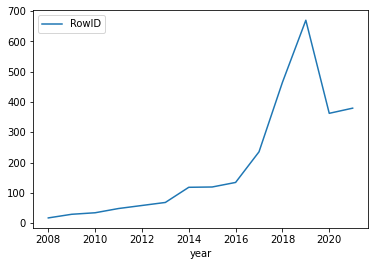

In [65]:
years_by_count.plot()

In [66]:
years_by_count.to_csv('years_by_count.csv')

In [67]:
df_dist = df.dropna(subset=['District'])
df_dist.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
45,1399110.875,608724.0625,46,21-0333,2021-08-11,2021-08-11,Blue,Parris,NaN,1998-07-06,Male,Black,4402 Fernhill Ave,Baltimore,Md,21215,Northwest,621,West Arlington,39.3377,-76.6932,"(39.3377,-76.6932)",NaN,8437 days,23,8,11,2021,"(39.3377, -76.6932)"


In [68]:
dist_year=df_dist.groupby(['year', 'District']).size()
dist_year.to_csv('dist.csv')

In [69]:
df.describe()

,X,Y,RowID,Shape,age,month,date_month,year
count,2.530000e+03,2530.000000,2748.000000,0.0,2747,2748.000000,2748.000000,2748.000000
mean,1.416622e+06,599202.187500,1374.500000,NaN,10367 days 06:55:41.827448064,6.561863,16.382824,2017.789665
std,3.901699e+04,22016.828125,793.423594,NaN,3221 days 18:06:28.849161504,3.412566,8.614320,2.823560
min,-1.720966e+00,11.321385,1.000000,NaN,840 days 00:00:00,1.000000,1.000000,2008.000000
25%,1.406518e+06,593003.562500,687.750000,NaN,7997 days 12:00:00,4.000000,10.000000,2017.000000
50%,1.416737e+06,599001.250000,1374.500000,NaN,9584 days 00:00:00,7.000000,16.000000,2019.000000
75%,1.428932e+06,607934.750000,2061.250000,NaN,11747 days 12:00:00,10.000000,24.000000,2020.000000
max,1.653035e+06,729759.562500,2748.000000,NaN,29323 days 00:00:00,12.000000,31.000000,2021.000000


In [70]:
# districts by count
# dist_by_count=df_dist[['District','year', 'RowID']].groupby('District', 'year').agg('count')

In [71]:
df.to_csv('data.csv', index=False)

In [72]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
516,1428932.375,612957.4375,517,20-0226,2020-08-20,2021-08-25,Smallwood,Devin,NaN,1991-04-13,Male,Black,1569 Winston Ave,Baltimore,Md,21239,Northeast,413,Stonewood-Pentwood-Winston,39.349,-76.5877,"(39.349,-76.5877)",NaN,10722 days,29,8,20,2020,"(39.349, -76.5877)"


In [73]:
# BINS

# # Create bins in which to place values based upon TED Talk views
# bins = [0, 199999, 399999, 599999, 799999, 999999,
#         1999999, 2999999, 3999999, 4999999, 50000000]

In [74]:
# %pip install geopandas

In [75]:
# %pip install shapely

In [76]:
df['District'].isna().sum()

488

In [77]:
df['year'].isna().sum()

0

In [78]:
district_df=df.dropna(subset=['District'])
district_df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
1310,1399093.125,588763.8125,1311,19-0101,2019-02-25,2021-08-26,Ricks,Dontae,NaN,1996-06-13,Male,Black,4726 Dartford Ave,Baltimore,Md,21229,Southwest,822,Tremont,39.2829,-76.6935,"(39.2829,-76.6935)",NaN,8292 days,22,2,25,2019,"(39.2829, -76.6935)"


In [79]:
age_df=df.dropna(subset=['Age'])
age_df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
2315,1411090.0,590081.6875,2316,15-0251,2015-05-27,2020-12-07,Walston,Damon,NaN,1991-03-27,Male,Black,2147 Boyd St,Baltimore,Md,21223,Southwest,835,Boyd-Booth,39.2864,-76.6511,"(39.2864,-76.6511)",NaN,8827 days,24,5,27,2015,"(39.2864, -76.6511)"


In [80]:
median_age=age_df['Age'].median()
youngest=age_df['Age'].min()
oldest_person=age_df.sort_values('age', ascending=False).head(1)
oldest=oldest_person['Age']
print(f'youngest: {youngest} \n oldest: {oldest} \n median: {median_age}')

youngest: 15 
 oldest: 1574    80
Name: Age, dtype: object 
 median: 26.0


In [81]:
gender_profile=df['Gender'].value_counts()
gender_profile

Male      2688
Female      60
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Race'>

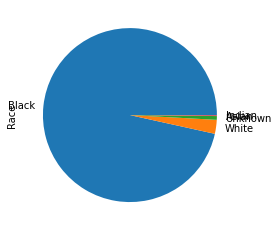

In [82]:
racial_profile=df['Race'].value_counts()
racial_profile.plot(kind='pie')

In [83]:
age_df.sort_values('age', ascending=False)

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,month,date_month,year,coordinates
1574,1361726.875,619188.4375,1575,18-0563,2018-10-10,2021-03-30,Chavis,Gordon,NaN,1938-06-29,Male,Black,"9620 Mendoza Road, Randallstown, 21133",Randallstown,Md,21133,NaN,NaN,NaN,39.3667,-76.8253,"(39.3667,-76.8253)",NaN,29323 days,80,10,10,2018,"(39.3667, -76.8253)"
1477,NaN,NaN,1478,18-0667,2018-12-06,2020-12-07,Gomez,Irvin,NaN,1944-08-31,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,"(,)",NaN,27125 days,74,12,6,2018,"(nan, nan)"
643,NaN,NaN,644,20-0096,2020-03-02,2020-12-07,Wynne,Hardaway,NaN,1948-01-29,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,"(,)",NaN,26331 days,72,3,2,2020,"(nan, nan)"
2349,1402956.375,592965.7500,2350,15-0119,2015-03-23,2021-08-24,Cobb,Jessie,NaN,1945-05-02,Male,Black,607 Mount Holly St,Baltimore,Md,21229,Southwest,815,Edgewood,39.2944,-76.6798,"(39.2944,-76.6798)",NaN,25527 days,69,3,23,2015,"(39.2944, -76.6798)"
1144,NaN,NaN,1145,19-0279,2019-05-14,2020-12-07,Bass,Gold,Leroy,1950-04-08,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,"(,)",NaN,25238 days,69,5,14,2019,"(nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,1426750.125,594844.9375,2680,10-0354,2010-08-31,2020-12-07,Hall,Anthony,NaN,1994-07-07,Male,Black,1621 E Madison St,Baltimore,Md,21287,Eastern,323,Gay Street,39.2993,-76.5957,"(39.2993,-76.5957)",NaN,5899 days,16,8,31,2010,"(39.2993, -76.5957)"
2624,1409505.750,589857.1250,2625,11-0487,2011-11-21,2020-12-07,Holt,Arteesha,NaN,1996-04-23,Female,Black,2526 W Lombard St,Baltimore,Md,21223,Southwest,835,Shipley Hill,39.2858,-76.6567,"(39.2858,-76.6567)",NaN,5690 days,15,11,21,2011,"(39.2858, -76.6567)"
2710,1426328.375,568545.4375,2711,09-0260,2009-08-13,2021-08-23,Dorsey,Raheem,Jabar,1994-06-02,Male,Black,1107 Seaboard Ct,Baltimore,Md,21225,Southern,913,Brooklyn,39.2271,-76.5976,"(39.2271,-76.5976)",NaN,5551 days,15,8,13,2009,"(39.2271, -76.5976)"
206,1411806.250,595220.1250,207,21-0171,2021-06-04,2021-06-04,Chance,Brion,NaN,2019-02-15,Male,Black,1022 Appleton St,Baltimore,Md,21217,Western,722,Midtown-Edmondson,39.3005,-76.6485,"(39.3005,-76.6485)",NaN,840 days,2,6,4,2021,"(39.3005, -76.6485)"


In [84]:
## example to adjust
#  urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# urban_avg_fare.head()

In [85]:
# dbc=pd.read_csv('districtsCount.csv', index_col=None)
# dbc

In [86]:
zips_by_count=df[['District', 'RowID','ZipCode',]].groupby(['District', 'ZipCode',]).agg('count')

In [87]:
## remember to adjust column names after writing

# zips_by_count.to_csv('zips_by_count.csv')

In [88]:
# import pandas as pd
# import geopandas as gpd
# from shapely import wkt  
# import json  
# geo_df= pd.read_csv("data.csv", low_memory=False)
# geo_df['geometry'] = geo_df['coordinates'].apply(wkt.loads)

In [89]:
# from: https://geoffboeing.com/2015/10/exporting-python-data-geojson/

# def df_to_geojson(df, properties, lat='Latitude', lon='Longitude'):
#     geojson = {'type':'FeatureCollection', 'features':[]}
#     for _, row in df.iterrows():
#         feature = {'type':'Feature',
#                    'properties':{},
#                    'geometry':{'type':'Point',
#                                'coordinates':[]}}
#         feature['geometry']['coordinates'] = [row[lon],row[lat]]
#         for prop in properties:
#             feature['properties'][prop] = row[prop]
#         geojson['features'].append(feature)
#     return geojson

In [90]:
# df.sample()

In [91]:
#  from: https://stackoverflow.com/questions/49243736/how-do-i-handle-object-of-type-timestamp-is-not-json-serializable-in-python

# def cast_for_gsheets(df):
#     # casting as string if not serializable
#     for column, dt in zip(df.columns, df.dtypes):
#         if dt.type not in [
#             np.int64,
#             np.float_,
#             np.bool_,
#         ]:
#             df.loc[:, column] = df[column].astype(str)
#     return df

# df = cast_for_gsheets(df)


In [92]:
# df.to_json('geoJson_data.json', orient="records")

In [93]:
# result = df.to_json("geoJson_data.json")
# parsed = json.loads(result)
# json.dumps(parsed, orient="records", indent=4) 
# result

In [94]:
# cols = ['CaseNumber', 'CreatedDate', 'ModifiedDate', 'LastName', 'FirstName', 'DateOfBirth', 'Gender', 'Race', 'FullAddress', 'City', 'State', 'ZipCode', 'Post', 'Neighborhood', 'Age', 'year']
# geojson = df_to_geojson(df, cols)

In [95]:
# output_filename = 'geoJson_data.js'
# with open(output_filename, 'w') as output_file:
#     # output_file.write('var data = ')
#     json.dump(geojson, output_filen, indent=2, orient) 

